In [9]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import json
from desitarget.targetmask import desi_mask, bgs_mask, mws_mask
import glob
from collections import Counter
plt.rcParams.update({'font.size': 15})

In [3]:
program = "dark_gray"
#program = "bright"
hemisphere = "north"
target_mask = desi_mask["BGS_ANY"]
targetdata = fitsio.read("targets/{}_{}.fits".format(program, hemisphere))
targetdata = np.sort(targetdata, order='TARGETID')

In [4]:
n = len(targetdata)
r = np.random.random(n)
rr = r < 0.001

In [5]:
fba_files = glob.glob("fba_{}_{}/fba-*.fits".format(program, hemisphere))
print(len(fba_files))

6905


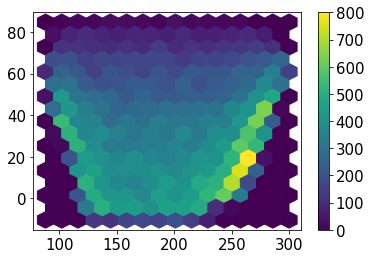

In [6]:
#plt.scatter(, , s=0.1)
plt.hexbin((targetdata['RA'][rr]), targetdata['DEC'][rr], gridsize=15,bins=None)
plt.colorbar()

In [7]:

t_assigned = []
t_avail = []
for fba_file in fba_files:
    fassign = fitsio.read(fba_file, ext="FASSIGN")
    favail = fitsio.read(fba_file, ext="FAVAIL")
    t_assigned.append(fassign["TARGETID"])
    t_avail.append(favail["TARGETID"])


In [8]:
targetid_assigned = np.concatenate(t_assigned)
targetid_available = np.concatenate(t_avail)

In [ ]:
targetid_assigned

In [10]:
counter_assigned = Counter(targetid_assigned)

In [11]:
id_assigned = np.array(list(counter_assigned.keys()))
count_assigned = np.array(list(counter_assigned.values()))

ii = np.argsort(id_assigned)
id_assigned = id_assigned[ii]
count_assigned = count_assigned[ii]

is_target = np.isin(id_assigned, targetdata['TARGETID'])
id_assigned = id_assigned[is_target]
count_assigned = count_assigned[is_target]

n_assigned = np.zeros(len(targetdata), dtype=int)

ii = np.isin(targetdata['TARGETID'], id_assigned)
n_assigned[ii] = count_assigned

In [12]:
is_available = np.zeros(len(targetdata), dtype=bool)
id_available = np.isin(targetdata['TARGETID'], targetid_available)
is_available[id_available] = True

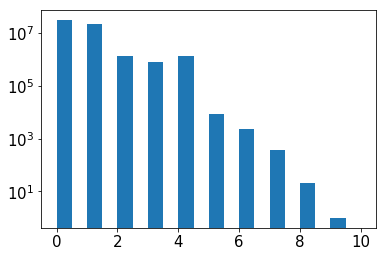

In [13]:
n = plt.hist(n_assigned[is_available], log=True, bins=np.linspace(0,10,21))

In [14]:
types = {'isELG':desi_mask['ELG'],
        'isLRG':desi_mask['LRG'],
        'isQSO':desi_mask['QSO'],
        'isBGS_ANY':desi_mask['BGS_ANY'],
        'isMWS_ANY':desi_mask['MWS_ANY']}

In [16]:
masks = {}
for t, m in zip(types.keys(), types.values()):
    ii = (targetdata['DESI_TARGET']&m)!=0
    print(t, np.count_nonzero(ii))
    masks[t] = ii

isELG 26821024
isLRG 4636222
isQSO 3078682
isBGS_ANY 6789026
isMWS_ANY 21605740


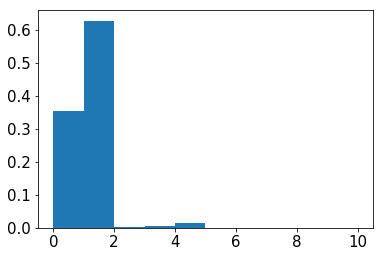

In [47]:
n = plt.hist(n_assigned[masks['isELG']&is_available], log=False, density=True, bins=np.linspace(0,10,11))

In [34]:
bgs_mask

bgs_mask:
  - [BGS_FAINT,        0, "BGS faint targets", {'obsconditions': 'BRIGHT|GRAY|DARK', 'priorities': {'UNOBS': 2000, 'MORE_ZWARN': 2000, 'MORE_ZGOOD': 1000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 1}]
  - [BGS_BRIGHT,       1, "BGS bright targets", {'obsconditions': 'BRIGHT', 'priorities': {'UNOBS': 2100, 'MORE_ZWARN': 2100, 'MORE_ZGOOD': 1000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 1}]
  - [BGS_WISE,         2, "BGS wise targets", {'obsconditions': 'BRIGHT', 'priorities': {'UNOBS': 2000, 'MORE_ZWARN': 2000, 'MORE_ZGOOD': 1000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 1}]
  - [BGS_FAINT_HIP,    3, "BGS faint targets at bright priorty", {'obsconditions': 'BRIGHT', 'priorities': {'UNOBS': 2100, 'MORE_ZWARN': 2100, 'MORE_ZGOOD': 1000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 1}]
  - [BGS_FAINT_NORTH,  8, "BGS faint cuts tuned for Bok/Mosaic", {'obsconditions': 'BRIGHT|GRAY|DARK', 'priorities': {'UNOBS': 0, 'MORE_ZWARN': 0, 'MORE_ZGOOD': 0